In [8]:
%matplotlib inline

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

# Linear and Logistic Regression Quiz

## Get the data

In [2]:
wine_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(wine_url, sep=";")

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Train test split

In [5]:
wine_attributes = wine_data.drop(columns="quality")
wine_target = wine_data.quality

wine_attributes.shape, wine_target.shape

((1599, 11), (1599,))

## Explore

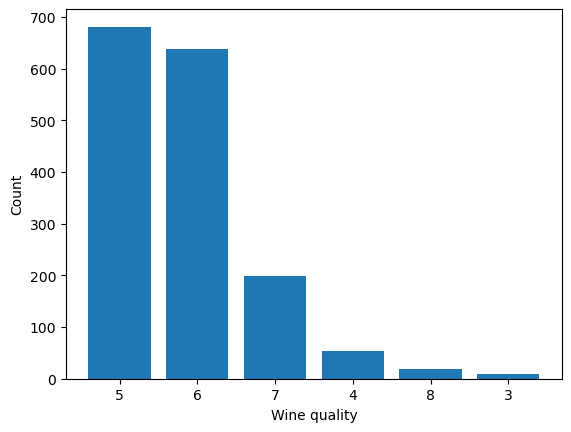

In [70]:
heights = wine_data.quality.value_counts()
plt.bar(range(len(heights)), heights)
plt.xticks(range(len(heights)), heights.index)
plt.xlabel("Wine quality")
plt.ylabel("Count")
plt.show()

## Linear regression

In [71]:
model = LinearRegression()

In [72]:
model.fit(wine_attributes, wine_target)

LinearRegression()

In [73]:
model.intercept_.round(2)

21.97

In [74]:
model.score(wine_attributes, wine_target)

0.3605517030386881

### Residual

In [76]:
predictions = model.predict(wine_attributes)
actual = wine_target

results = pd.DataFrame({
    'predicted': predictions,
    'actual': actual,
})

results["residuals"] = results.actual - results.predicted

results.head()

,predicted,actual,residuals
0,5.032850,5,-0.032850
1,5.137880,5,-0.137880
2,5.209895,5,-0.209895
3,5.693858,6,0.306142
4,5.032850,5,-0.032850


#### Plot

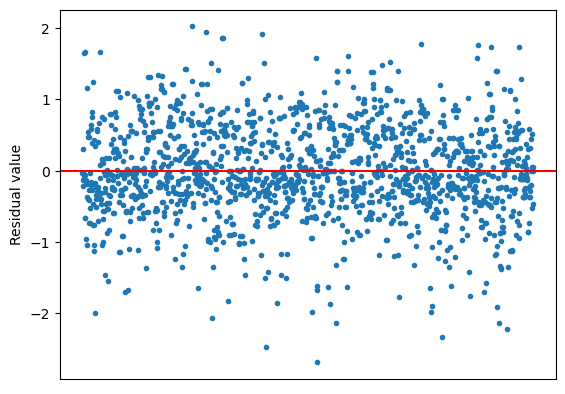

In [69]:
plt.plot(results.residuals, ".")
plt.axhline(0, color="red")
plt.ylabel("Residual value")
plt.xticks([])
plt.show()

#### Histogram

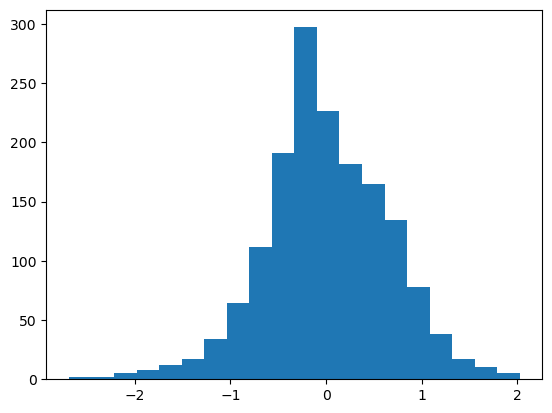

In [83]:
plt.hist(results.residuals, bins= 20)
plt.show()

### Confusion matrix

In [99]:
y_pred = model.predict(wine_attributes).round().astype('int64')
y_true = wine_target

In [103]:
np.stack((y_pred, y_true), axis=1)

array([[5, 5],
       [5, 5],
       [5, 5],
       ...,
       [6, 6],
       [5, 5],
       [6, 6]], dtype=int64)

In [104]:
confusion_matrix(y_true, y_pred)

array([[  0,   1,   8,   1,   0,   0],
       [  0,   1,  34,  18,   0,   0],
       [  0,   3, 477, 197,   4,   0],
       [  0,   0, 183, 428,  27,   0],
       [  0,   0,   7, 152,  40,   0],
       [  0,   0,   0,  11,   7,   0]], dtype=int64)

## Polynomial regression

In [20]:
poly = PolynomialFeatures(degree=2)
wine_poly = poly.fit_transform(wine_attributes)
wine_poly.shape

(1599, 78)

In [23]:
model.fit(wine_poly, wine_target)

LinearRegression()

In [24]:
model.score(wine_poly, wine_target).round(2)

0.43